In [1]:
#file reading function
def parse_csv(filename, *, sep = ',', quote = '"'):
   
    #initializing the variables to store the data
    columns = None
    table = []

    #open the file and read each line
    with open(filename, 'r', encoding = 'utf-8-sig') as file:
        try:
            for line in file.readlines():
                line = line.strip()

                if not line:
                    continue

                parts = line.split(sep)
                i = 0
                entries = []

                while True:

                    if i >= len(parts):
                        break

                    if not parts[i].startswith(quote):
                        entries.append(parts[i])
                        i += 1

                    else:
                        entries.append(parts[i][len(quote):])

                        while True:

                            if parts[i].endswith(quote):
                                entries[-1] = entries[-1][:-len(quote)]
                                break
                            i += 1
                            entries[-1] += sep + parts[i]
                        i += 1

                #checks to see if all the columns are checked
                if columns is None:
                    columns = entries

                else:
                    table.append(entries)
        except:
            print('Error Reading File')

    return columns, table

In [2]:
import pandas as pd

#getting the data from the csvs and putting it into dataframes
columns, table = parse_csv('rainfall-last-year.csv')
df1 = pd.DataFrame(table, columns = columns)
df1

columns, table = parse_csv('barometer-last-year.csv')
df2 = pd.DataFrame(table, columns = columns)

columns, table = parse_csv('indoor-temperature-last-year.csv')
df3 = pd.DataFrame(table, columns = columns)

columns, table = parse_csv('outside-temperature-last-year.csv')
df4 = pd.DataFrame(table, columns = columns)

In [3]:
#setting the common axis on which to merge all the dataframes
try:
    df1.set_index('DateTime',inplace=True)
    df2.set_index('DateTime',inplace=True)
    df3.set_index('DateTime',inplace=True)
    df4.set_index('DateTime',inplace=True)
except:
    print("DateTime header not present")
    
#changing the column type to floats
try:
    df1['mm'] = df1['mm'].astype(float)

    df2['Baro'] = df2['Baro'].astype(float)

    df3['Temperature'] = df3['Temperature'].astype(float)
    df3['Temperature_range (low)'] = df3['Temperature_range (low)'].astype(float)
    df3['Temperature_range (high)'] = df3['Temperature_range (high)'].astype(float)
    df3['Humidity'] = df3['Humidity'].astype(float)

    df4['Temperature'] = df4['Temperature'].astype(float)
    df4['Temperature_range (low)'] = df4['Temperature_range (low)'].astype(float)
    df4['Temperature_range (high)'] = df4['Temperature_range (high)'].astype(float)
except:
    print("Couldn't change data to float")
    
#renaming the columns
try:
    df1.rename(columns={'mm': 'Rainfall'}, inplace=True)

    df3.rename(columns={'Temperature': 'Indoor Temp', \
                        'Temperature_range (low)': 'Indoor Temp_Range (low)', \
                        'Temperature_range (high)': 'Indoor Temp_Range (high)'}, inplace=True)

    df4.rename(columns={'Temperature': 'Outside Temp', \
                        'Temperature_range (low)': 'Outside Temp_Range (low)', \
                        'Temperature_range (high)': 'Outside Temp_Range (high)'}, inplace=True)
except:
    print("Column headers incorrect")
    
#create a final dataframe with everything merged
df_merge = pd.concat([df1,df2,df3,df4],axis=1,sort=True).reset_index()
df_merge.rename(columns = {'index':'DateTime'})  

,DateTime,Rainfall,Baro,Humidity,Indoor Temp,Indoor Temp_Range (low),Indoor Temp_Range (high),Outside Temp,Outside Temp_Range (low),Outside Temp_Range (high)
0,2016-10-09 00:00:00,0.0,1021.9,54.0,21.93000,21.0,22.8,10.66000,7.2,13.8
1,2016-10-10 00:00:00,0.0,1019.9,52.0,21.77000,20.4,23.6,8.94000,5.6,12.8
2,2016-10-11 00:00:00,0.0,1015.8,51.0,21.36000,19.9,23.0,8.69000,5.3,14.3
3,2016-10-12 00:00:00,0.0,1013.2,51.0,21.44000,20.0,23.6,11.55000,9.0,14.9
4,2016-10-13 00:00:00,0.0,1005.9,52.0,21.22000,20.1,22.3,9.40000,6.0,13.3
...,...,...,...,...,...,...,...,...,...,...
350,2017-10-05 00:00:00,1.0,1010.6,56.0,21.34000,20.6,22.8,13.32000,10.0,17.2
351,2017-10-06 00:00:00,0.0,1019.2,54.0,21.34000,20.3,22.3,11.58000,7.2,17.6
352,2017-10-07 00:00:00,1.1,1011.5,55.0,21.34000,20.6,21.9,13.70000,11.7,16.4
353,2017-10-08 00:00:00,0.0,1013.1,55.0,21.81000,20.6,23.5,13.60000,9.6,21.7


In [4]:
#calculation of the summary statistics
for column in df_merge.columns[1:]:

    print('Column name: ' + column)
    print('Min: ' + str(df_merge[column].min()))
    print('Max: ' + str(df_merge[column].max()))
    print('Mean: ' + str(df_merge[column].mean()))
    print('Standard Deviation: ' + str(df_merge[column].std(ddof=0)))
    print()

Column name: Rainfall
Min: 0.0
Max: 23.2
Mean: 1.5487252124645903
Standard Deviation: 3.31988682285402

Column name: Baro
Min: 979.6
Max: 1035.6
Mean: 1009.9988732394369
Standard Deviation: 9.855751098537652

Column name: Humidity
Min: 37.0
Max: 59.0
Mean: 48.51977401129943
Standard Deviation: 5.181551798928015

Column name: Indoor Temp
Min: 18.04
Max: 29.21
Mean: 21.827884887005663
Standard Deviation: 2.05539796267004

Column name: Indoor Temp_Range (low)
Min: 14.9
Max: 28.2
Mean: 20.555932203389844
Standard Deviation: 2.4017252170059953

Column name: Indoor Temp_Range (high)
Min: 19.7
Max: 31.1
Mean: 23.533615819209032
Standard Deviation: 1.6990608670104335

Column name: Outside Temp
Min: -1.81
Max: 26.38
Mean: 11.138876760563381
Standard Deviation: 5.3474939052492845

Column name: Outside Temp_Range (low)
Min: -4.1
Max: 18.7
Mean: 7.865633802816899
Standard Deviation: 4.8720533116473

Column name: Outside Temp_Range (high)
Min: 1.5
Max: 38.5
Mean: 15.524225352112673
Standard Deviati

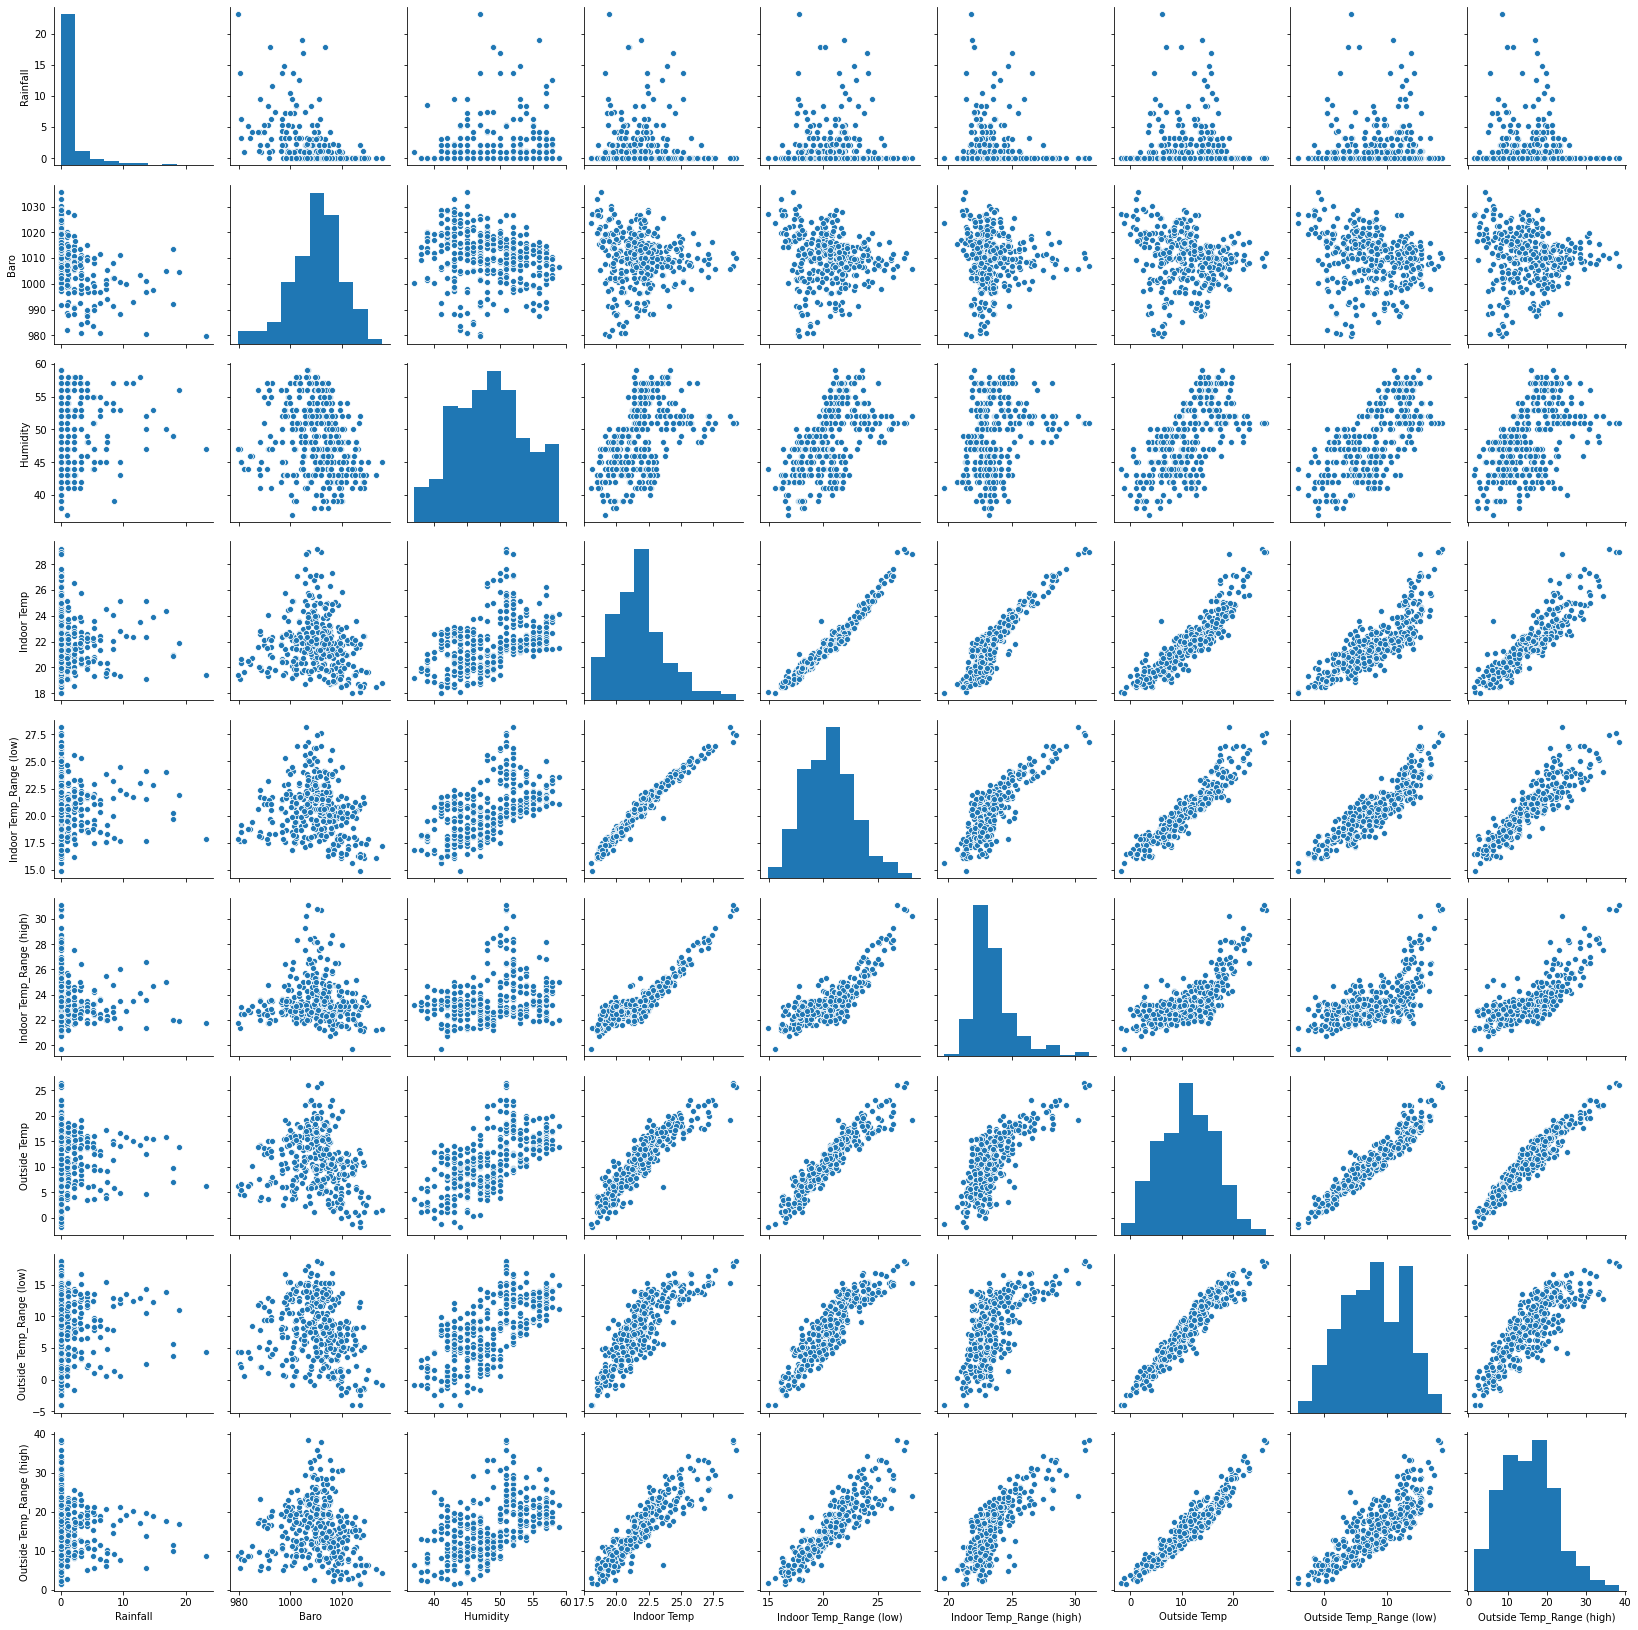

In [5]:
#printing of all the columns against one another
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_merge)
plt.savefig('Task 1 Graph Plots.pdf')

In [6]:
import calendar

#creates a copy of the dataframe to write the month data and season info to
seasonal_df = df_merge.copy(deep=True)
date = seasonal_df['index']
pd.to_datetime(date)

#add the month information to the dataframe
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', \
           7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}

seasonal_df['Month No.'] = pd.DatetimeIndex(seasonal_df['index']).month
seasonal_df['Month Name'] = seasonal_df['Month No.'].apply(lambda x: calendar.month_abbr[x])
seasonal_df['Season'] = seasonal_df['Month No.'].apply(lambda x: seasons[x])

seasonal_df.rename(columns = {'index':'DateTime'}, inplace = True)
seasonal_df.to_csv('Output Data.csv', index = False)

In [8]:
columns, table = parse_csv('indoor-temperature-last-year-broken.csv')
df1 = pd.DataFrame(table, columns = columns)
df1

,DateTime,Humidity,Temperature,Temperature_range (low),Temperature_range (high)
0,2016-10-09 00:00:00,54,21.93,,22.8
1,2016-10-10 00:00:00,52,21.77,20.4,23.6
2,"2016-10-11 00:00:00""",51,21.36,19.9,23
3,2016-10-12 00:00:00,51,21.44,20,23.6
4,2016-10-13 00:00:00,52,21.22,20.1,22.3
...,...,...,...,...,...
349,2017-10-05 00:00:00,56,21.34,20.6,22.8
350,2017-10-06 00:00:00,54,21.34,20.3,22.3
351,2017-10-07 00:00:00,55,21.34,20.6,21.9
352,2017-10-08 00:00:00,55,21.81,20.6,23.5
